In [1]:
%matplotlib inline
from scipy .io import loadmat
ocr = loadmat('ocr.mat')

In [2]:
ocr


{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jan 22 15:05:26 2015',
 '__version__': '1.0',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'labels': array([[5],
        [0],
        [4],
        ..., 
        [5],
        [6],
        [8]], dtype=uint8),
 'testdata': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'testlabels': array([[7],
        [2],
        [1],
        ..., 
        [4],
        [5],
        [6]], dtype=uint8)}

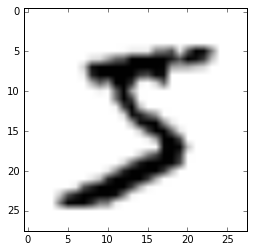

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.imshow(ocr['data'][0].reshape((28 ,28)), cmap=cm.gray_r)


In [13]:
def oneNN(X_train, X_test, Y_train):
    e_distance = np.sqrt(np.linalg.norm(X_train)**2 + np.linalg.norm(X_test)**2 - 2*np.dot(X_train, np.transpose(X_test)))
    d_labels = np.hstack((e_distance, Y_train))
    preds_col = d_labels[:,0:len(X_test)].argmin(axis = 0) 
    preds = np.transpose(d_labels[[preds_col],10000])

    return preds

In [14]:
import numpy as np
import random
from __future__ import division
n = [1000, 2000, 4000, 8000]

list_errors = []

for i in n:
    error_rates = []
    for j in range(1,11):
        sel = random.sample(xrange(60000),i)

        train_data = df_norm[sel].astype(float) 
        labels = ocr['labels'][sel].astype(float)
        test_data = dft_norm.astype(float)
        test_labels = ocr['testlabels'].astype(float)
    
        preds = oneNN(train_data, test_data, labels)
        preds2 = (preds-test_labels).tolist()
    
        preds_list = []
        for x in preds2:
            for y in x:
                preds_list.append(y)

        preds = (1-(preds_list.count(0)/len(preds_list)))        
        error_rates.append(preds)
    
    list_errors.append(error_rates)
        

In [15]:
import pandas as pd

df_errors = pd.DataFrame(list_errors).transpose()
df_errors.columns = ["1000","2000","4000","8000"]

df_std = df_errors.std(axis = 0)
df_mean = df_errors.mean(axis = 0)

df_total = pd.concat([df_std, df_mean], axis = 1)
df_total.columns = ["Standard_Dev", "Mean"]

In [16]:
list_errors

[[0.11529999999999996,
  0.12770000000000004,
  0.11699999999999999,
  0.1129,
  0.11809999999999998,
  0.12960000000000005,
  0.10729999999999995,
  0.12380000000000002,
  0.10929999999999995,
  0.1261],
 [0.09550000000000003,
  0.0917,
  0.09640000000000004,
  0.09309999999999996,
  0.09630000000000005,
  0.10309999999999997,
  0.09889999999999999,
  0.0998,
  0.09289999999999998,
  0.08950000000000002],
 [0.07640000000000002,
  0.08030000000000004,
  0.08309999999999995,
  0.07630000000000003,
  0.07820000000000005,
  0.07479999999999998,
  0.0797,
  0.0806,
  0.07950000000000002,
  0.0726],
 [0.06589999999999996,
  0.06810000000000005,
  0.06469999999999998,
  0.06140000000000001,
  0.06559999999999999,
  0.06000000000000005,
  0.06399999999999995,
  0.06559999999999999,
  0.0625,
  0.0615]]

In [ ]:
from pandas.tools.plotting import table

ax = plt.subplot( frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df_total)  # where df is your data frame

plt.savefig('normalized_table_results.png')

NameError: name 'df_total' is not defined

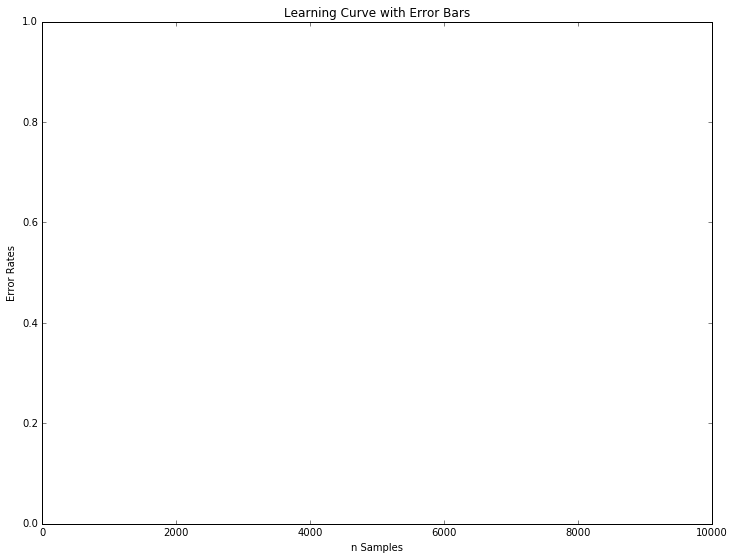

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.xlim([0,10000])
plt.title("Learning Curve with Error Bars")
plt.ylabel("Error Rates")
plt.xlabel("n Samples")
plt.errorbar(df_total.index, df_total.Mean,yerr=df_total.Standard_Dev)

plt.savefig("Learning_Curve_norm.pdf")


In [10]:
from scipy import stats

data = pd.DataFrame(ocr['data'].astype(float))
df_norm = (data - data.mean()) / (data.max() - data.min())
df_norm = df_norm.fillna(0).as_matrix()

testdata = pd.DataFrame(ocr['testdata'].astype(float))
dft_norm = (testdata - testdata.mean()) / (testdata.max() - testdata.min())
dft_norm = dft_norm.fillna(0).as_matrix()

type(df_norm)


numpy.ndarray

In [11]:
from scipy.spatial.distance import cdist

d_matrix = cdist(train_data, test_data, lambda u, v: np.sqrt(((u-v)**2).sum()))
d_matrix.shape

NameError: name 'train_data' is not defined

In [12]:
def e_distance(U,V):
    e_distance = np.sqrt(np.linalg.norm(U)**2 + np.linalg.norm(V)**2 - 2*np.dot(U, np.transpose(V)))
#    e_distance = np.sqrt(np.sum((U[:,np.newaxis] - V)**2, axis=-1))

    print e_distance.shape
    print e_distance